# This notebook tries to augment data using forest diffusion on datasets

#### Vanilla ForestDiffusion on diabetes dataset

Class distribution before augmentation: {0: 500, 1: 268}


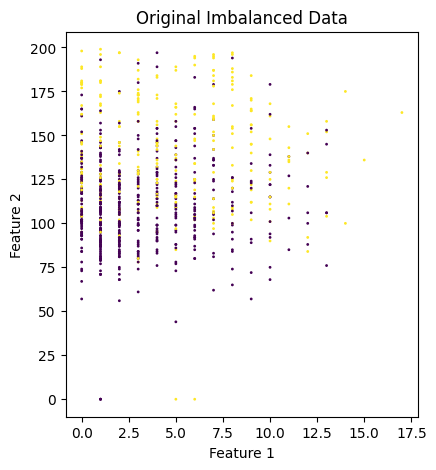

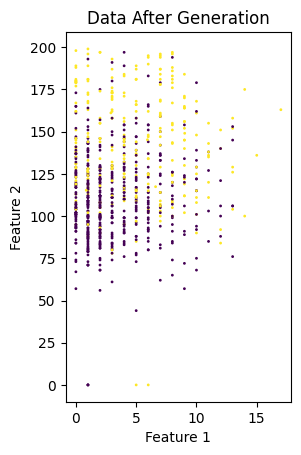

Class distribution after augmentation: {0.0: 500, 1.0: 283}
Recall score (original data): 0.6625
Recall score (generated data): 0.8000
F1 score (original data): 0.6503
F1 score (generated data): 0.7529
Classification Report (original data):
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231

Classification Report (generated data):
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       151
           1       0.71      0.80      0.75        80

    accuracy                           0.82       231
   macro avg       0.80      0.81      0.80       231
weighted avg       0.83      0.82      0.82       231

Number of fake samples generated: 15


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score

# Step 1: Load the CSV file
#file_path = 'creditcard.csv'  # Update this path to your local CSV file
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
# Assuming the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Plot the original imbalanced data (first two features for visualization)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Original Data', s=1)
plt.title('Original Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Separate the minority class
X_minority = X[y == 1]
# Identify integer columns
int_columns = data.select_dtypes(include=['int']).columns
int_indexes = []
for col in int_columns:
    col_index = data.columns.get_loc(col)
    int_indexes.append(col_index)
# Step 4: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
X_minority_fake = forest_model.generate(batch_size=len(X)//50 )  # Adjust the batch size to create a balanced dataset

# Add generated samples to the main imbalanced dataset
X_balanced = np.concatenate((X, X_minority_fake), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake.shape[0])), axis=0)



# Step 5: Plot the generated data (first two features for visualization)
plt.subplot(1, 2, 2)
plt.scatter(X_balanced[:, 0], X_balanced[:, 1], c=y_balanced, cmap='viridis', label='Generated Data', s=1)
plt.title('Data After Generation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 6: Split the dataset into training and test sets (original and balanced)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 7: Train a simple classifier on both original and generated datasets
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 8: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recalls_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

# Step 9: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recalls_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")
print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))

# Step 10: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")

#### Changing the Batch Size from 10 to 750 on a 20 increment

Class distribution before augmentation: {0: 500, 1: 268}


Number of fake samples generated: 10
Class distribution after augmentation: {0.0: 500, 1.0: 278}
Recall score for major class(generated data): 0.8543
Recall score for minor class(generated data): 0.8000
F1 score for major class(generated data): 0.7711
F1 score for minor class(generated data): 0.7711
Number of fake samples generated: 30
Class distribution after augmentation: {0.0: 500, 1.0: 298}
Recall score for major class(generated data): 0.8675
Recall score for minor class(generated data): 0.8000
F1 score for major class(generated data): 0.7805
F1 score for minor class(generated data): 0.7805
Number of fake samples generated: 50
Class distribution after augmentation: {0.0: 500, 1.0: 318}
Recall score for major class(generated data): 0.8874
Recall score for minor class(generated data): 0.7375
F1 score for major class(generated data): 0.7564
F1 score for minor class(generated data): 0.7564
Number of fake samples generated: 70
Class distribution after augmentation: {0.0: 500, 1.0: 338}


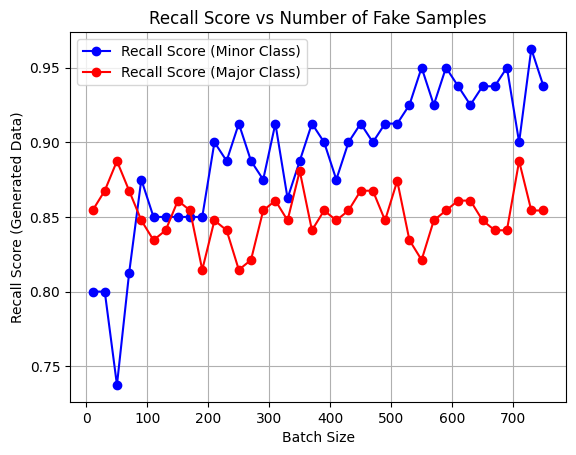

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score

# Step 1: Load the CSV file
#file_path = 'creditcard.csv'  # Update this path to your local CSV file
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
# Assuming the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Plot the original imbalanced data (first two features for visualization)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Original Data', s=1)
# plt.title('Original Imbalanced Data')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# Separate the minority class
X_minority = X[y == 1]
major_class_data_recall_score_list=list()
minor_class_data_recall_score_list=list()
batch_size_list=list()

# Identify integer columns
int_columns = data.select_dtypes(include=['int']).columns
int_indexes = []
for col in int_columns:
    col_index = data.columns.get_loc(col)
    if col_index != 8:  # Skip column index 8
        int_indexes.append(col_index)
        
# Step 4: Upsample the minority class using ForestDiffusionModel
iter_List = list(range(10,len(X),20))
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=int_indexes, diffusion_type='flow', n_jobs=-1)
for i in iter_List:
    X_minority_fake = forest_model.generate(batch_size=i )  # Adjust the batch size to create a balanced dataset

    # Add generated samples to the main imbalanced dataset
    X_balanced = np.concatenate((X, X_minority_fake), axis=0)
    y_balanced = np.concatenate((y, np.ones(X_minority_fake.shape[0])), axis=0)

    # Step 5: Plot the generated data (first two features for visualization)
    # plt.subplot(1, 2, 2)
    # plt.scatter(X_balanced[:, 0], X_balanced[:, 1], c=y_balanced, cmap='viridis', label='Generated Data', s=1)
    # plt.title('Data After Generation')
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.show()

    # Check and print the class distribution after augmentation
    unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
    class_dist_after = dict(zip(unique_bal, counts_bal))
    print(f"Number of fake samples generated: {len(X_minority_fake)}")
    print(f"Class distribution after augmentation: {class_dist_after}")

    # Step 6: Split the dataset into training and test sets (original and balanced)
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

    # Step 7: Train a simple classifier on both original and generated datasets
    clf_orig = RandomForestClassifier(random_state=42)
    clf_orig.fit(X_train_orig, y_train_orig)

    clf_bal = RandomForestClassifier(random_state=42)
    clf_bal.fit(X_train_bal, y_train_bal)

    # Step 8: Predict and calculate recall and F1 scores
    y_pred_orig = clf_orig.predict(X_test_orig)
    y_pred_bal = clf_bal.predict(X_test_orig)

    recalls_orig = {}
    recalls_bal = {}

    # Calculate recall for class 0 and class 1 separately for original data
    recalls_orig[0] = recall_score(y_test_orig, y_pred_orig, pos_label=0)
    recalls_orig[1] = recall_score(y_test_orig, y_pred_orig, pos_label=1)

    # Calculate recall for class 0 and class 1 separately for balanced data
    recalls_bal[0] = recall_score(y_test_orig, y_pred_bal, pos_label=0)
    recalls_bal[1] = recall_score(y_test_orig, y_pred_bal, pos_label=1)

    #Adding current recall score and batch size to the list for plotting
    major_class_data_recall_score_list.append(recalls_bal[0])
    minor_class_data_recall_score_list.append(recalls_bal[1])
    batch_size_list.append(i)


    f1_orig = f1_score(y_test_orig, y_pred_orig)
    f1_bal = f1_score(y_test_orig, y_pred_bal)

    # Step 9: Print the performance metrics
    # print(f"Recall score (original data): {recall_orig:.4f}")
    print(f"Recall score for major class(generated data): {recalls_bal[0]:.4f}")
    print(f"Recall score for minor class(generated data): {recalls_bal[1]:.4f}")
    # print(f"F1 score (original data): {f1_orig:.4f}")
    print(f"F1 score for major class(generated data): {f1_bal:.4f}")
    print(f"F1 score for minor class(generated data): {f1_bal:.4f}")
    # print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
    # print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))

    # Step 10: Print the number of fake samples generated
    # print(f"Number of fake samples generated: {len(X_minority_fake)}")
import matplotlib.pyplot as plt

# Create the plot
plt.plot(batch_size_list, minor_class_data_recall_score_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
# Adding title and labels
plt.title('Recall Score vs Number of Fake Samples')
plt.xlabel('Batch Size')
plt.ylabel('Recall Score (Generated Data)')
plt.legend(loc="upper left")

# Show the grid
plt.grid()

# Display the plot
plt.show()


#### Observing Where Recall value is high for both of the classes wrt a Threshold

Indices where both recall scores are high: [15, 17, 22, 23, 25, 30, 31, 35]


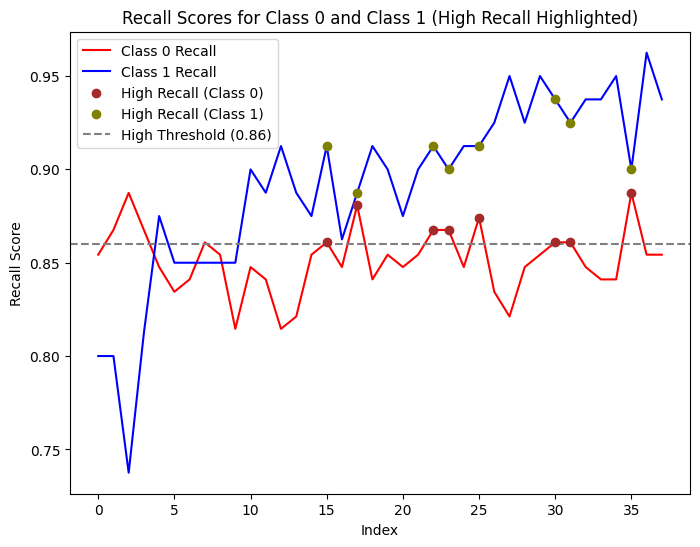

In [5]:
# Step 1: Assume these are the two lists of recall scores for class 0 and class 1
recall_class_0 = major_class_data_recall_score_list
recall_class_1 = minor_class_data_recall_score_list

# Step 2: Define a threshold for what constitutes a "high" recall score
high_threshold = 0.86

# Step 3: Find the indices where both recall scores are "high"
high_recall_indices = []
for i, (r0, r1) in enumerate(zip(recall_class_0, recall_class_1)):
    if r0 >= high_threshold and r1 >= high_threshold:
        high_recall_indices.append(i)

# Step 4: Print the indices where both recall scores are high
print("Indices where both recall scores are high:", high_recall_indices)

# Separate the recall scores for the high recall indices
high_recalls_0 = [recall_class_0[i] for i in high_recall_indices]
high_recalls_1 = [recall_class_1[i] for i in high_recall_indices]

# Step 5: Plot the recall scores and highlight the indices with high recall
plt.figure(figsize=(8, 6))

# Plot all recall values for reference
plt.plot(range(len(recall_class_0)), recall_class_0, 'r-', label='Class 0 Recall')
plt.plot(range(len(recall_class_1)), recall_class_1, 'b-', label='Class 1 Recall')

# Highlight the points where both recall values are high
plt.scatter(high_recall_indices, high_recalls_0, color='brown', label='High Recall (Class 0)', zorder=5)
plt.scatter(high_recall_indices, high_recalls_1, color='olive', label='High Recall (Class 1)', zorder=5)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Recall Score')
plt.title('Recall Scores for Class 0 and Class 1 (High Recall Highlighted)')
plt.axhline(y=high_threshold, color='gray', linestyle='--', label=f'High Threshold ({high_threshold})')
plt.legend()

# Show the plot
plt.show()

# Credit Card Dataset with 15000:50 Ratio

Class distribution before augmentation: {0: 4000, 1: 50}


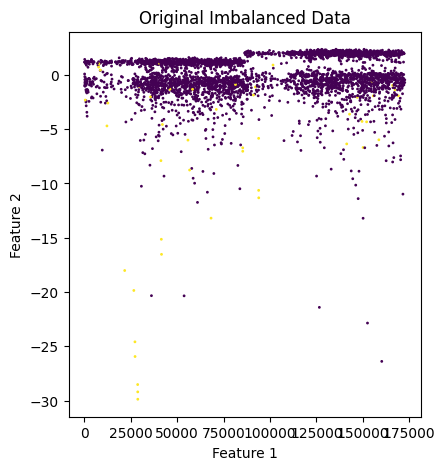

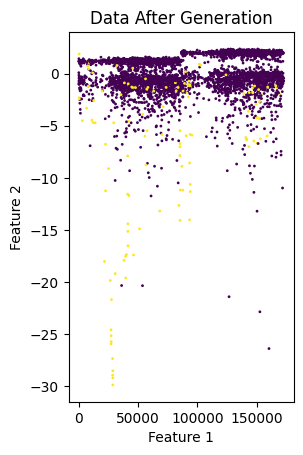

Class distribution after augmentation: {0.0: 4000, 1.0: 131}
Recall score (original data): 0.7647
Recall score (generated data): 0.8824
F1 score (original data): 0.8125
F1 score (generated data): 0.8824
Classification Report (original data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1198
           1       0.87      0.76      0.81        17

    accuracy                           1.00      1215
   macro avg       0.93      0.88      0.90      1215
weighted avg       0.99      1.00      0.99      1215

Classification Report (generated data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1198
           1       0.88      0.88      0.88        17

    accuracy                           1.00      1215
   macro avg       0.94      0.94      0.94      1215
weighted avg       1.00      1.00      1.00      1215

Number of fake samples generated: 81


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score

# Step 1: Load the CSV file
file_path = 'creditcard_sampled.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
# Assuming the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Plot the original imbalanced data (first two features for visualization)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Original Data', s=1)
plt.title('Original Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Separate the minority class
X_minority = X[y == 1]

# Step 4: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
X_minority_fake = forest_model.generate(batch_size=len(X)//50 )  # Adjust the batch size to create a balanced dataset

# Add generated samples to the main imbalanced dataset
X_balanced = np.concatenate((X, X_minority_fake), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake.shape[0])), axis=0)



# Step 5: Plot the generated data (first two features for visualization)
plt.subplot(1, 2, 2)
plt.scatter(X_balanced[:, 0], X_balanced[:, 1], c=y_balanced, cmap='viridis', label='Generated Data', s=1)
plt.title('Data After Generation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 6: Split the dataset into training and test sets (original and balanced)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 7: Train a simple classifier on both original and generated datasets
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 8: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recalls_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

# Step 9: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recalls_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")
print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))

# Step 10: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score

# Step 1: Load the CSV file
#file_path = 'creditcard.csv'  # Update this path to your local CSV file
file_path = 'creditcard_sampled.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
# Assuming the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Plot the original imbalanced data (first two features for visualization)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Original Data', s=1)
# plt.title('Original Imbalanced Data')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# Separate the minority class
X_minority = X[y == 1]
major_class_data_recall_score_list=list()
minor_class_data_recall_score_list=list()
batch_size_list=list()

# Identify integer columns
int_columns = data.select_dtypes(include=['int']).columns
int_indexes = []
for col in int_columns:
    col_index = data.columns.get_loc(col)
    if col_index != 8:  # Skip column index 8
        int_indexes.append(col_index)
        
# Step 4: Upsample the minority class using ForestDiffusionModel
iter_List = list(range(10,len(X),20))
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=int_indexes, diffusion_type='flow', n_jobs=-1)
for i in iter_List:
    X_minority_fake = forest_model.generate(batch_size=i )  # Adjust the batch size to create a balanced dataset

    # Add generated samples to the main imbalanced dataset
    X_balanced = np.concatenate((X, X_minority_fake), axis=0)
    y_balanced = np.concatenate((y, np.ones(X_minority_fake.shape[0])), axis=0)

    # Step 5: Plot the generated data (first two features for visualization)
    # plt.subplot(1, 2, 2)
    # plt.scatter(X_balanced[:, 0], X_balanced[:, 1], c=y_balanced, cmap='viridis', label='Generated Data', s=1)
    # plt.title('Data After Generation')
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.show()

    # Check and print the class distribution after augmentation
    unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
    class_dist_after = dict(zip(unique_bal, counts_bal))
    print(f"Number of fake samples generated: {len(X_minority_fake)}")
    print(f"Class distribution after augmentation: {class_dist_after}")

    # Step 6: Split the dataset into training and test sets (original and balanced)
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

    # Step 7: Train a simple classifier on both original and generated datasets
    clf_orig = RandomForestClassifier(random_state=42)
    clf_orig.fit(X_train_orig, y_train_orig)

    clf_bal = RandomForestClassifier(random_state=42)
    clf_bal.fit(X_train_bal, y_train_bal)

    # Step 8: Predict and calculate recall and F1 scores
    y_pred_orig = clf_orig.predict(X_test_orig)
    y_pred_bal = clf_bal.predict(X_test_orig)

    recalls_orig = {}
    recalls_bal = {}

    # Calculate recall for class 0 and class 1 separately for original data
    recalls_orig[0] = recall_score(y_test_orig, y_pred_orig, pos_label=0)
    recalls_orig[1] = recall_score(y_test_orig, y_pred_orig, pos_label=1)

    # Calculate recall for class 0 and class 1 separately for balanced data
    recalls_bal[0] = recall_score(y_test_orig, y_pred_bal, pos_label=0)
    recalls_bal[1] = recall_score(y_test_orig, y_pred_bal, pos_label=1)

    #Adding current recall score and batch size to the list for plotting
    major_class_data_recall_score_list.append(recalls_bal[0])
    minor_class_data_recall_score_list.append(recalls_bal[1])
    batch_size_list.append(i)


    f1_orig = f1_score(y_test_orig, y_pred_orig)
    f1_bal = f1_score(y_test_orig, y_pred_bal)

    # Step 9: Print the performance metrics
    # print(f"Recall score (original data): {recall_orig:.4f}")
    print(f"Recall score for major class(generated data): {recalls_bal[0]:.4f}")
    print(f"Recall score for minor class(generated data): {recalls_bal[1]:.4f}")
    # print(f"F1 score (original data): {f1_orig:.4f}")
    print(f"F1 score for major class(generated data): {f1_bal:.4f}")
    print(f"F1 score for minor class(generated data): {f1_bal:.4f}")
    # print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
    # print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))

    # Step 10: Print the number of fake samples generated
    # print(f"Number of fake samples generated: {len(X_minority_fake)}")
import matplotlib.pyplot as plt

# Create the plot
plt.plot(batch_size_list, minor_class_data_recall_score_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
# Adding title and labels
plt.title('Recall Score vs Number of Fake Samples')
plt.xlabel('Batch Size')
plt.ylabel('Recall Score (Generated Data)')
plt.legend(loc="upper left")

# Show the grid
plt.grid()

# Display the plot
plt.show()


Class distribution before augmentation: {0: 4000, 1: 50}


Class distribution before augmentation: {1: 1, 2: 1, 3: 15, 4: 57, 5: 115, 6: 259, 7: 391, 8: 568, 9: 689, 10: 634, 11: 487, 12: 267, 13: 203, 14: 126, 15: 103, 16: 67, 17: 58, 18: 42, 19: 32, 20: 26, 21: 14, 22: 6, 23: 9, 24: 2, 25: 1, 26: 1, 27: 2, 29: 1}


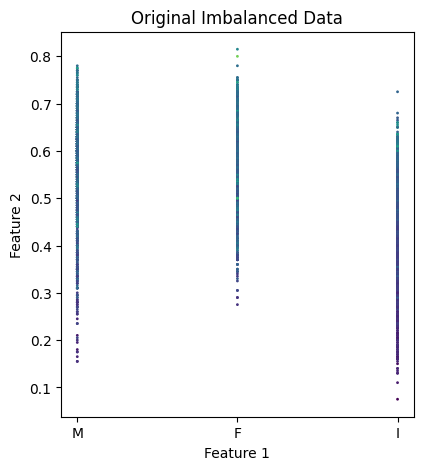

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score

# Step 1: Load the CSV file
#file_path = 'creditcard.csv'  # Update this path to your local CSV file
file_path = 'abalone_dataset.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
# Assuming the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Plot the original imbalanced data (first two features for visualization)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Original Data', s=1)
plt.title('Original Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Separate the minority class
X_minority = X[y == 1]
# # Identify integer columns
# int_columns = data.select_dtypes(include=['int']).columns
# int_indexes = []
# for col in int_columns:
#     col_index = data.columns.get_loc(col)
#     if col_index != 8:  # Skip column index 8
#         int_indexes.append(col_index)
# Step 4: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[0], int_indexes=[], diffusion_type='flow', n_jobs=-1)
X_minority_fake = forest_model.generate(batch_size=len(X)//50 )  # Adjust the batch size to create a balanced dataset

# Add generated samples to the main imbalanced dataset
X_balanced = np.concatenate((X, X_minority_fake), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake.shape[0])), axis=0)



# Step 5: Plot the generated data (first two features for visualization)
plt.subplot(1, 2, 2)
plt.scatter(X_balanced[:, 0], X_balanced[:, 1], c=y_balanced, cmap='viridis', label='Generated Data', s=1)
plt.title('Data After Generation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 6: Split the dataset into training and test sets (original and balanced)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 7: Train a simple classifier on both original and generated datasets
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 8: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recalls_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

# Step 9: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recalls_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")
print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))

# Step 10: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")